In [1]:
# Nama : Muhammad Nizar Yoga Pratama
# Tema Tantangan : Document Classification
# JABAR DIGITAL SERVICE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
# membaca dataset documents

In [5]:
df = pd.read_csv('trainingdata.txt', skiprows=[0,0], delimiter="\t",  header=None, names=["Document"])

In [6]:
df.head()

,Document
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [7]:
# memisahkan antara teks dokumen dan label

In [8]:
dataset = pd.DataFrame(columns=['Label','Text'])

for row_data in range(0, len(df['Document'])):
    label = df['Document'][row_data][0]
    text = df['Document'][row_data][2:]
    dataset = dataset.append({'Label': label, 'Text': text}, ignore_index=True)

In [9]:
dataset

,Label,Text
0,1,champion products ch approves stock split cham...
1,2,computer terminal systems cpml completes sale ...
2,1,cobanco inc cbco year net shr cts vs dlrs net ...
3,1,am international inc am nd qtr jan oper shr lo...
4,1,brown forman inc bfd th qtr net shr one dlr vs...
...,...,...
5480,1,kelly oil and gas partners kly year dec shr ct...
5481,8,japan seeks to strengthen paris currency accor...
5482,1,tcw convertible securities cvt sets dividend t...
5483,8,south korean won fixed at month high the bank ...


In [10]:
# menghitung jumlah sample data setiap class dataset

In [11]:
dataset['Label'].value_counts()

1    2840
2    1596
6     253
3     251
8     206
7     190
4     108
5      41
Name: Label, dtype: int64

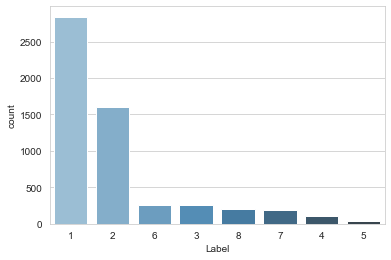

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="whitegrid")
sns.countplot(data=dataset, x='Label', order=dataset['Label'].value_counts().index, palette="Blues_d")
plt.show()

In [13]:
# Terlihat bahwa sample data antar class tidak seimbang atau Imbalanced classes
# Sehingga perlu hati-hati sekali untuk tahapan proses berikutnya

In [14]:
# Membagi dataset menjadi data training (70%) dan data testing (30%)
# Karena dataset bersifat Imbalanced classes, sehingga perlu digunakan parameter "stratify", untuk mencegah semakin parahnya Imbalanced classes
# Hal tersebut supaya persentase proporsi pembagian sample antar class menjadi sama baik pada data training dan data testing

In [15]:
from sklearn.model_selection import train_test_split

X = dataset['Text']
y = dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

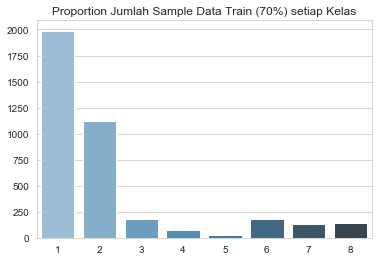

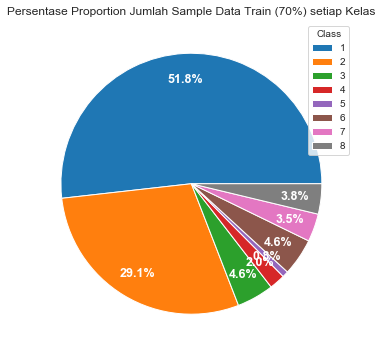

In [16]:
(label, counts) = np.unique(y_train, return_counts=True)

plt.title("Proportion Jumlah Sample Data Train (70%) setiap Kelas", fontsize=12)
sns.barplot(label, counts, order=label, palette="Blues_d")

plt.figure(figsize=(6,6))
plt.pie(counts, labels=label, autopct='%1.1f%%', pctdistance=0.8, textprops={'color':"w", 'weight':'bold', 'fontsize':12.5})
plt.title("Persentase Proportion Jumlah Sample Data Train (70%) setiap Kelas", fontsize=12)
plt.legend(label, loc="upper right", title="Class")
plt.show()

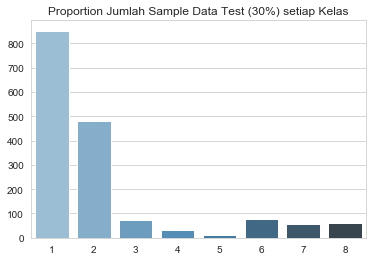

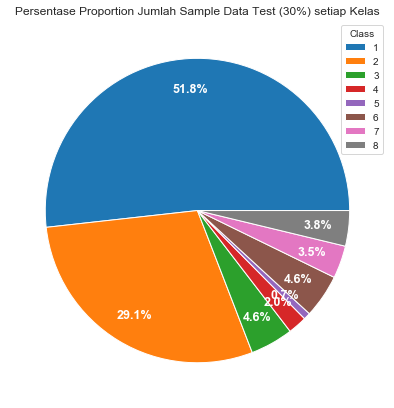

In [17]:
(label, counts) = np.unique(y_test, return_counts=True)

plt.title("Proportion Jumlah Sample Data Test (30%) setiap Kelas", fontsize=12)
sns.barplot(label, counts, order=label, palette="Blues_d")

plt.figure(figsize=(7,7))
plt.pie(counts, labels=label, autopct='%1.1f%%', pctdistance=0.8, textprops={'color':"w", 'weight':'bold', 'fontsize':12.5})
plt.title("Persentase Proportion Jumlah Sample Data Test (30%) setiap Kelas", fontsize=12)
plt.legend(label, loc="upper right", title="Class")
plt.show()

In [18]:
# Terlihat bahwa pembagian proporsi sample setiap class baik pada data training dan testing memiliki persentase yang sama
# misal class 1 persentase untuk data training dan testing sebesar 51.8%

In [19]:
# Pembuatan model Machine Learning, digunakan Classification Model
# dengan algoritma dari SVC dan MultinomialNB
# alasan menggunakan 2 algoritma supaya ada pembanding mana algorima yang menghasilkan akurasi prediksi terbaik

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [21]:
# Pembuatan model SVC dengan menggunakan metode Pipeline
# dimana data training dilakukan preprocessing terlebih dahulu dengan TfidfVectorizer
# kemudian dilatih menggunakan SVC

In [22]:
svc_model = Pipeline([('tfidf_vect', TfidfVectorizer()), ('clf', SVC())])
svc_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

In [23]:
# SVC Model yang telah dibuat dan dilatih kemudian digunakan untuk memprediksi data test

In [24]:
predictions_svc = svc_model.predict(X_test)

In [25]:
X_test.iloc[1]

'american express board approved nippon life purchase of shearson interest '

In [26]:
for i in range(7):
    print("Teks Dokumen={}, \nPrediksi Class={}\n".format(X_test.iloc[i], predictions_svc[i]))

Teks Dokumen=midland bank said it cutting its base rate to pct from pct , 
Prediksi Class=7

Teks Dokumen=american express board approved nippon life purchase of shearson interest , 
Prediksi Class=2

Teks Dokumen=wallace computer services inc wcs dividend qtly div cts vs cts previously pay june record june one reuter , 
Prediksi Class=1

Teks Dokumen=dresser industries di sees return to profit dresser industries inc said it expects the joint ventures it has entered into and a gradual improvement in the energy market to allow it to regain profitability before the end of the current year dresser earned dlrs for the year ended october after a mln dlr gain from a change in accounting and pension plan curtailment and a mln dlr writedown of oilfield assets reuter , 
Prediksi Class=1

Teks Dokumen=thousand trails inc trls year loss shr loss dlrs vs profit cts net loss vs profit revs mln vs mln note current year figures include mln dlr after tax writedown of land and improvements a mln dlr in

In [27]:
# Pembuatan model MultinomialNB dengan menggunakan metode Pipeline
# dimana data training dilakukan preprocessing terlebih dahulu dengan TfidfVectorizer
# kemudian dilatih menggunakan MultinomialNB

In [28]:
mnb_model = Pipeline([('tfidf_vect', TfidfVectorizer()), ('clf', MultinomialNB())])
mnb_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
# MultinomialNB Model yang telah dibuat dan dilatih kemudian digunakan untuk memprediksi data test

In [30]:
predictions_mnb = mnb_model.predict(X_test)

In [31]:
# Evaluasi Hasil Prediksi setiap model dengan menggunakan metrics confusion_matrix, classification_report, accuracy_score

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print("Confusion Matrix")
print("-----------------------------")
print('Support Vector Classification')
print(metrics.confusion_matrix(y_test, predictions_svc))
print(" ")
print("Naive Bayes")
print(metrics.confusion_matrix(y_test, predictions_mnb))

Confusion Matrix
-----------------------------
Support Vector Classification
[[833  19   0   0   0   0   0   0]
 [  4 474   0   0   0   1   0   0]
 [  0   2  73   0   0   0   0   0]
 [  1  13   0  19   0   0   0   0]
 [  0  10   0   0   2   0   0   0]
 [  0   7   0   0   0  69   0   0]
 [  1   6   0   0   0   0  43   7]
 [  1   6   0   0   0   0   5  50]]
 
Naive Bayes
[[836  16   0   0   0   0   0   0]
 [ 17 462   0   0   0   0   0   0]
 [ 16  52   7   0   0   0   0   0]
 [  7  26   0   0   0   0   0   0]
 [  2  10   0   0   0   0   0   0]
 [ 26  44   0   0   0   6   0   0]
 [ 30  27   0   0   0   0   0   0]
 [ 25  33   0   0   0   0   0   4]]


In [34]:
print("Classification Report")
print("-----------------------------")
print('Support Vector Classification')
print(metrics.classification_report(y_test, predictions_svc))
print(" ")
print("Naive Bayes")
print(metrics.classification_report(y_test, predictions_mnb))

Classification Report
-----------------------------
Support Vector Classification
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       852
           2       0.88      0.99      0.93       479
           3       1.00      0.97      0.99        75
           4       1.00      0.58      0.73        33
           5       1.00      0.17      0.29        12
           6       0.99      0.91      0.95        76
           7       0.90      0.75      0.82        57
           8       0.88      0.81      0.84        62

    accuracy                           0.95      1646
   macro avg       0.95      0.77      0.82      1646
weighted avg       0.95      0.95      0.95      1646

 
Naive Bayes
              precision    recall  f1-score   support

           1       0.87      0.98      0.92       852
           2       0.69      0.96      0.80       479
           3       1.00      0.09      0.17        75
           4       0.00      0.00   

In [35]:
# Akurasi prediksi secara keseluruhan
print("Akurasi prediksi secara keseluruhan")
print("-----------------------------------")
print("Support Vector Classification")
print(round(metrics.accuracy_score(y_test, predictions_svc),2))
print(" ")
print("Naive Bayes")
print(round(metrics.accuracy_score(y_test, predictions_mnb),2))

Akurasi prediksi secara keseluruhan
-----------------------------------
Support Vector Classification
0.95
 
Naive Bayes
0.8


In [36]:
# Dari tahapan diatas dan hasil evaluasi yang diperoleh
# dapat disimpulkan bahwa pembuatan model untuk Documents Classification berhasil dilakukan
# dengan SVC sebagai algoritma yang memiliki hasil prediksi terbaik (0.95 = 95%) jika dibandingkan dengan
# Naive Bayes (0.8 = 80%)